# Assignment 4 Sentiment Analysis
### Naitra Sheth
### Urvish Mandaliya

In [1]:
!pip install textblob

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows of the dataset
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove commas and semicolons
    text = text.replace(',', '')
    text = text.replace(';', '')
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

# Apply the function to the review column
df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naitr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naitr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from textblob import TextBlob

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['predicted_sentiment'] = df['review'].apply(analyze_sentiment)

# Function to classify sentiments into positive, negative, and neutral
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'  # positive
    elif polarity < -0.1:
        return 'negative'  # negative
    else:
        return 'neutral'  # neutral

# Apply sentiment classification
df['predicted_sentiment'] = df['predicted_sentiment'].apply(classify_sentiment)

# Display the first few predictions
print(df.head())

                                              review sentiment  \
0  One reviewer mentioned watching 1 Oz episode h...  positive   
1  A wonderful little production br br The filmin...  positive   
2  I thought wonderful way spend time hot summer ...  positive   
3  Basically family little boy Jake think zombie ...  negative   
4  Petter Mattei Love Time Money visually stunnin...  positive   

  predicted_sentiment  
0             neutral  
1            positive  
2            positive  
3             neutral  
4            positive  


In [5]:
from sklearn.metrics import accuracy_score, classification_report

# Map target values to numeric values for evaluation
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Map predicted sentiment to numeric values for evaluation
df['predicted_sentiment_numeric'] = df['predicted_sentiment'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'negative' else 2))

# For evaluation, consider only positive and negative classifications
df_eval = df[df['predicted_sentiment_numeric'] != 2]  # Exclude neutral predictions

# Calculate accuracy
accuracy = accuracy_score(df_eval['sentiment'], df_eval['predicted_sentiment_numeric'])
print(f'Accuracy: {accuracy}')

# Print classification report for more detailed evaluation
report = classification_report(df_eval['sentiment'], df_eval['predicted_sentiment_numeric'], target_names=['Negative', 'Positive'])
print(report)

Accuracy: 0.795449306858968
              precision    recall  f1-score   support

    Negative       0.94      0.47      0.62     11028
    Positive       0.76      0.98      0.86     19341

    accuracy                           0.80     30369
   macro avg       0.85      0.73      0.74     30369
weighted avg       0.83      0.80      0.77     30369



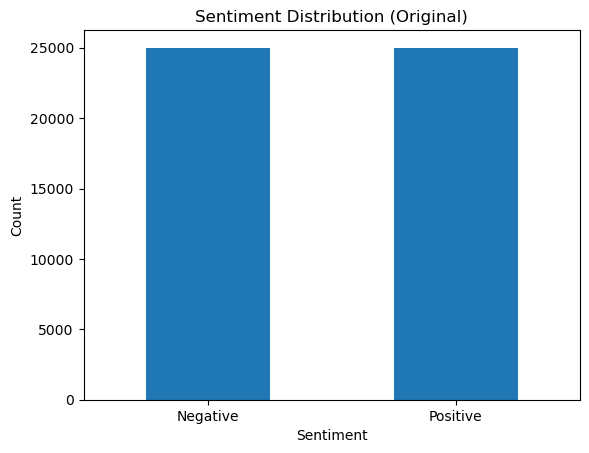

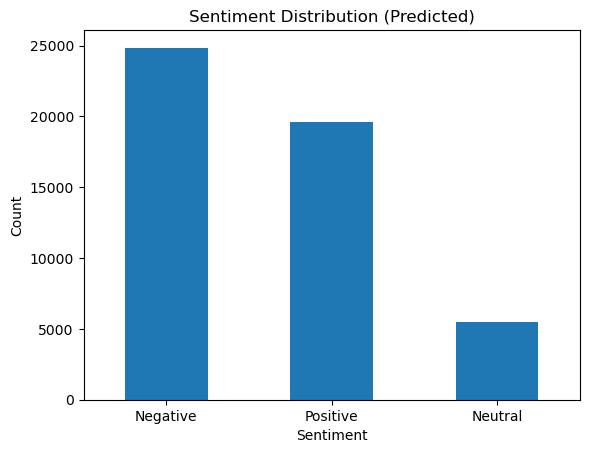

In [6]:
import matplotlib.pyplot as plt

# Visualize sentiment distribution in the original data
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution (Original)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()

# Visualize sentiment distribution in the predicted data
df['predicted_sentiment_numeric'].value_counts().plot(kind='bar', title='Sentiment Distribution (Predicted)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Positive', 'Neutral'], rotation=0)
plt.show()